<a href="https://colab.research.google.com/github/LauraPerezVilla/funlam/blob/master/TALLER_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Manejo de DataFrames
import numpy as np #Manejo de Listas, Diccionarios, Arrays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



In [ ]:
archivo_xlsx = '/content/BBDD_Hospitalizacion.xlsx'

df = pd.read_excel(archivo_xlsx)

df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [ ]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

se crea y se especifica la ruta de la base de datos, luego se usa la función df.info para saber que tipo de variables son y si hay que modificar alguna.

In [ ]:
df.dtypes

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

In [ ]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


se  ha realizado un info, un describe y dtypes después de cargada la base de datos, para analizar los datos y saber como continuar. Al analizarlos se puede observar que estos datos proporcionan una visión general de la población estudiada y de varios aspectos de la salud de su próstata. La presencia de datos faltantes y posibles anomalías resalta la necesidad de un análisis más detallado y una limpieza adicional para garantizar la precisión y la interpretación adecuada de los resultados.



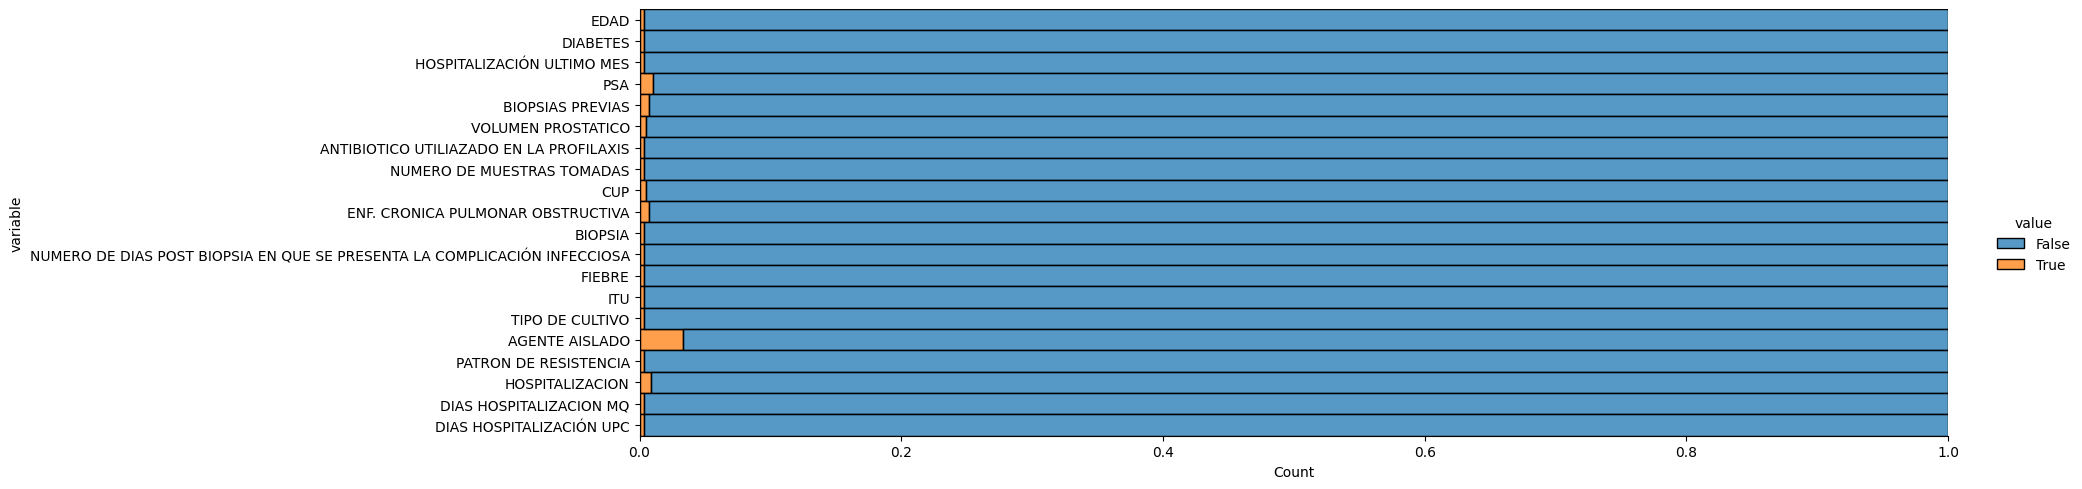

In [ ]:
(df.isnull().melt().pipe(lambda df:(sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=4))))
plt.show()

Aquí nos devuelve los indices de valores nulos en cualquier columna.

In [ ]:
indices_nulos = df[df.isnull().any(axis=1)].index
indices_nulos

Int64Index([  9,  26,  31,  76,  92,  99, 100, 103, 106, 109, 115, 116, 121,
            126, 128, 129, 130, 138, 139, 146, 151, 156, 167, 170, 565, 566,
            567, 568, 569],
           dtype='int64')

Este es el número de filas que tienen valores nulos.

In [ ]:
len(indices_nulos)

29

In [ ]:
df_filtrado = df.iloc[indices_nulos, :]

In [ ]:
valores_nulos_por_fila = df_filtrado.isnull().sum(axis=1)[indices_nulos]
valores_nulos_por_fila

9       1
26      1
31      1
76      1
92      1
99      1
100     1
103     1
106     1
109     1
115     1
116     1
121     1
126     1
128     1
129     1
130     1
138     1
139     1
146     1
151     1
156     1
167     1
170     1
565     3
566     2
567     1
568    20
569    20
dtype: int64

In [ ]:
df2 = df.drop(index= [568, 569])

In [ ]:
df2['HOSPITALIZACION'].isnull().sum()

3

In [ ]:
df2=df2.dropna(subset='HOSPITALIZACION')

Con el len miramos cuantos valores nulos tiene cada fila,se realiza una revisión a los nulos en la columna Hospitalizacion ya que es nuestra variable objetivo. Y luego eliminamos las filas que tienen nulos.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       565 non-null    float64
 1   DIABETES                                                                   565 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 565 non-null    object 
 3   PSA                                                                        561 non-null    float64
 4   BIOPSIAS PREVIAS                                                           563 non-null    object 
 5   VOLUMEN PROSTATICO                                                         564 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [ ]:
df2['EDAD'] = df2['EDAD'].astype(int)
df2['NUMERO DE MUESTRAS TOMADAS'] = df2['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df2['DIAS HOSPITALIZACION MQ'] = df2['DIAS HOSPITALIZACION MQ'].astype(int)
df2['DIAS HOSPITALIZACIÓN UPC'] = df2['DIAS HOSPITALIZACIÓN UPC'].astype(int)

In [ ]:
df2.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'NUMERO DIAS HASTA INFECCION'}, inplace=True)
df2.rename(columns={'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO'}, inplace=True)
df2.rename(columns={'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'ENF. PULMONAR'}, inplace=True)

Hacemos un boxplot e histogramas de las variables para descubrir valores atipicos y etender si son errores al cargar la base de datos

Text(0, 0.5, 'Frecuencia')

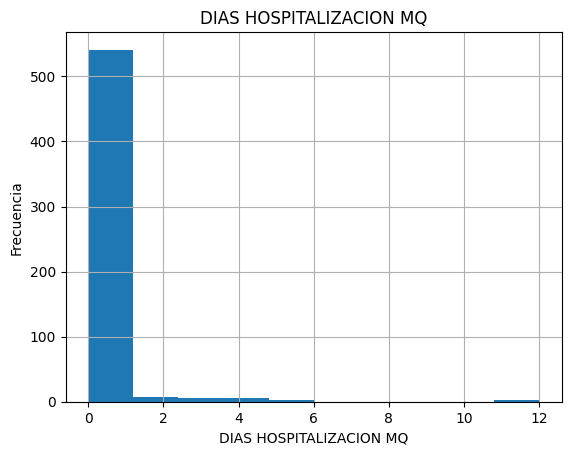

In [ ]:
df2["DIAS HOSPITALIZACION MQ"].hist()

plt.title('DIAS HOSPITALIZACION MQ')
plt.xlabel('DIAS HOSPITALIZACION MQ')
plt.ylabel('Frecuencia')

En este gráfico podemos observar que la mayoría de los registros son "0", por lo tanto la mayoría de los pacientes no fueron hospitalizados para tratamiento médico quirúrgico. Los valores atípicos en este caso no representan valores equivocados.

Text(0, 0.5, 'Frecuencia')

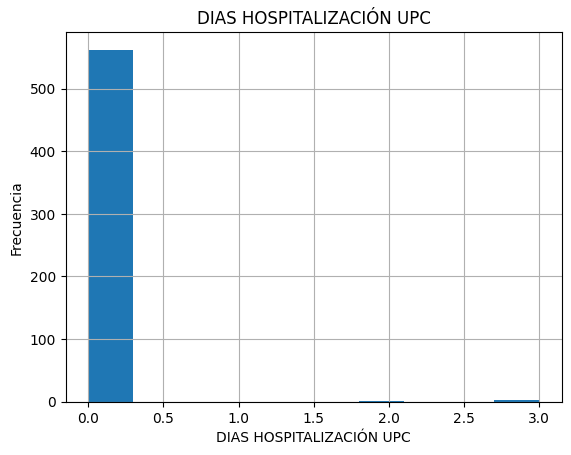

In [ ]:
df2["DIAS HOSPITALIZACIÓN UPC"].hist()

plt.title('DIAS HOSPITALIZACIÓN UPC')
plt.xlabel('DIAS HOSPITALIZACIÓN UPC')
plt.ylabel('Frecuencia')


En este gráfico podemos observar que la mayoría de los registros son "0", por lo tanto la mayoría de los pacientes no fueron hospitalizados para tratamiento de estado crítico. Los valores atípicos en este caso no representan valores equivocados.


Text(0, 0.5, 'Frecuencia')

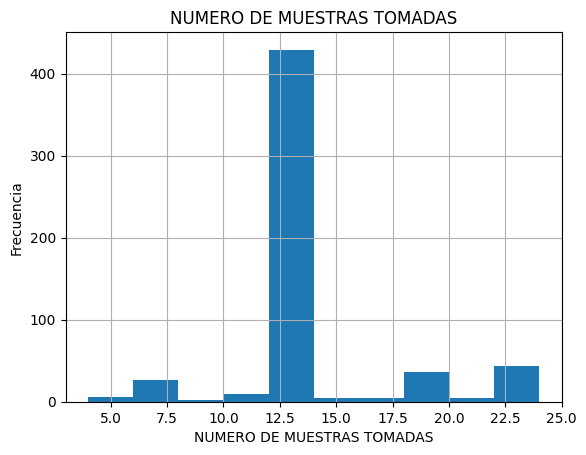

In [ ]:
df2["NUMERO DE MUESTRAS TOMADAS"].hist()

plt.title('NUMERO DE MUESTRAS TOMADAS')
plt.xlabel('NUMERO DE MUESTRAS TOMADAS')
plt.ylabel('Frecuencia')

En este gráfico podemos observar valores atípicos, pero son pertinentes a la cantidad de muestras tomadas.

Text(0, 0.5, 'Frecuencia')

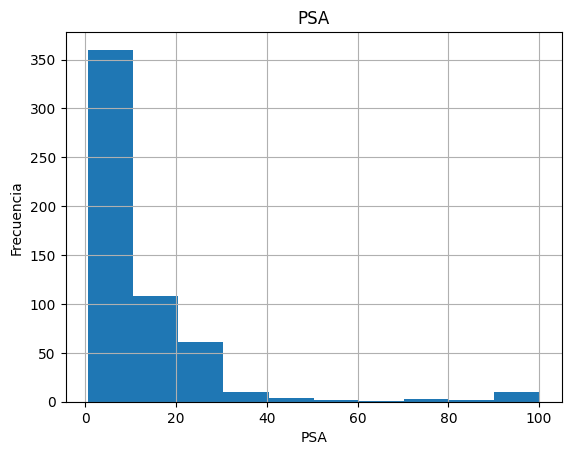

In [ ]:
df2["PSA"].hist()

plt.title('PSA')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')


En este gráfico aparentemente observamos un gran número de valores atípicos, pero investigamos la concentración del PSA en la sangre y los valores altos pueden corresponder a pacientes con cáncer de próstata o con metástasis. Fuente: https://www.quironsalud.com/blogs/es/salud-hombre/psa

Text(0, 0.5, 'Frecuencia')

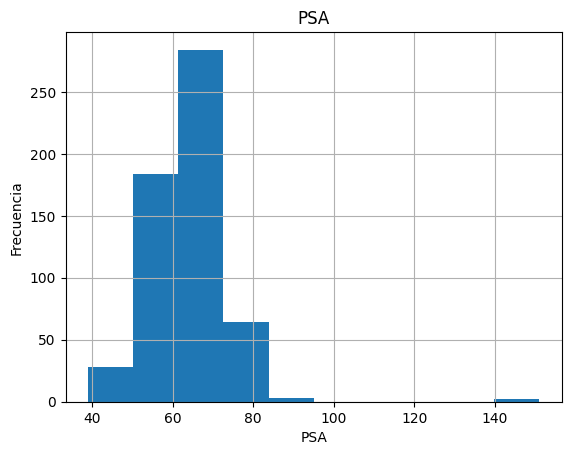

In [ ]:
df2["EDAD"].hist()

plt.title('PSA')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')


En este gráfico podemos observar 2 valores atípicos por encima de 140. Esto puede deberse a un error humano, en este caso procedo a reemplazar estos valores con la media de edad. Esto con la intencion de evitar alterar los datos


In [ ]:
df2 [df2["EDAD"] >100]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. PULMONAR,BIOPSIA,NUMERO DIAS HASTA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,143,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
181,151,NO,NO,5.7,NO,SI,OTROS,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0


In [ ]:
df2.loc[[161, 181], "EDAD"] = round(df2[df2["EDAD"] < 100]["EDAD"].mean())

Revisar valores faltantes o nulos

In [ ]:
num_vars = df2.select_dtypes(include=['float', 'int']).columns
null_counts = df2[num_vars].isnull().sum()
# Imprime los resultados
print("Cantidad de valores nulos o NaN en variables numéricas:")
print(null_counts)

Cantidad de valores nulos o NaN en variables numéricas:
EDAD                          0
PSA                           4
NUMERO DE MUESTRAS TOMADAS    0
DIAS HOSPITALIZACION MQ       0
DIAS HOSPITALIZACIÓN UPC      0
dtype: int64


Rellenamos los valores nulos de PSA con la media

In [ ]:
media = df2['PSA'].mean()
df2['PSA'] = df2['PSA'].fillna(media)

**Miramos** los valores únicos de cada columna categórica para normalizarlas

In [ ]:
valores_unicos = df2.apply(lambda x: x.unique())
valores_unicos

EDAD                           [53, 56, 57, 55, 67, 69, 44, 54, 68, 43, 65, 6...
DIABETES                                                                [NO, SI]
HOSPITALIZACIÓN ULTIMO MES                                              [NO, SI]
PSA                            [4.0, 7.7, 29.0, 7.0, 6.2, 6.0, 13.30030303030...
BIOPSIAS PREVIAS                                                   [NO, SI, nan]
VOLUMEN PROSTATICO                                                 [SI, NO, nan]
ANTIBIOTICO                    [FLUOROQUINOLONA_AMINOGLICOSIDO, CEFALOSPORINA...
NUMERO DE MUESTRAS TOMADAS         [12, 24, 18, 6, 16, 20, 10, 4, 8, 15, 22, 14]
CUP                                                                [NO, SI, nan]
ENF. PULMONAR                                  [NO, SI, EPOC, SI, ASMA, SI, nan]
BIOPSIA                        [NEG, ADENOCARCINOMA GLEASON 6 , ADENOCARCINOM...
NUMERO DIAS HASTA INFECCION                                  [1, 2, 3, 5, 9, NO]
FIEBRE                      

In [ ]:
Columnas = ["ANTIBIOTICO", "ENF. PULMONAR", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]

for columna in Columnas:

    df2[f"{columna}"] = df2[f"{columna}"].str.strip()

    valores_unicos = df2[f"{columna}"].unique()

    print(f"Valores únicos de la columna '{columna}':")
    for valor in valores_unicos:
        print(valor)
    print()


Valores únicos de la columna 'ANTIBIOTICO':
FLUOROQUINOLONA_AMINOGLICOSIDO
CEFALOSPORINA_AMINOGLUCOCIDO
OROQUINOLONAS
FLUOROQUINOLONA_AMINOGLICÓSIDO
OTROS

Valores únicos de la columna 'ENF. PULMONAR':
NO
SI, EPOC
SI, ASMA
SI
nan

Valores únicos de la columna 'BIOPSIA':
NEG
ADENOCARCINOMA GLEASON 6
ADENOCARCINOMA GLEASON 7
ADENOCARCINOMA GLEASON 10
ADENOCARCINOMA GLEASON 9
ADENOCARCINOMA GLEASON 8
PROSTATITIS
HIPERPLASIA PROSTATICA
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS

Valores únicos de la columna 'TIPO DE CULTIVO':
NO
HEMOCULTIVO
UROCULTIVO
HEMOCULTIVO Y UROCULTIVO

Valores únicos de la columna 'AGENTE AISLADO':
NO
E.COLI
PSEUDOMONAS AERUGINOSA
nan

Valores únicos de la columna 'PATRON DE RESISTENCIA':
NO
AMPI R, CIPRO R, GENTA R, SULFA M R
RESISTENTE A AMPI, CIPRO Y GENTA
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA
MULTI SENSIBLE



In [ ]:
df2["ANTIBIOTICO"] = df2["ANTIBIOTICO"].replace("FLUOROQUINOLONA_AMINOGLICÓSIDO","FLUOROQUINOLONA_AMINOGLICOSIDO")
df2["PATRON DE RESISTENCIA"] = df2["PATRON DE RESISTENCIA"].replace("RESISTENTE A AMPI, CIPRO Y GENTA","AMPI, CIPRO Y GENTA")
df2["PATRON DE RESISTENCIA"] = df2["PATRON DE RESISTENCIA"].replace("RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA","AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA")

Vamos a eliminar las columnas DIAS HOSPITALIZACIÓN UPC y DIAS HOSPITALIZACIÓN MQ ya que son redundantes con la columna

In [ ]:
df2 = df2.drop(["DIAS HOSPITALIZACION MQ", "DIAS HOSPITALIZACIÓN UPC"], axis = 1)

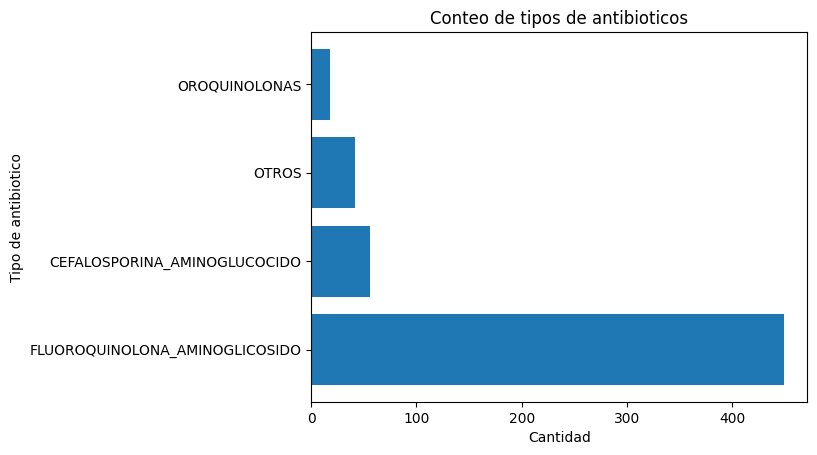

In [ ]:
# Crear el gráfico de barras
plt.barh(df2["ANTIBIOTICO"].value_counts().index, df2["ANTIBIOTICO"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de antibiotico')
plt.title('Conteo de tipos de antibioticos')

plt.show()

Realizamos gráficos de las columnas categóricas

Columnas = ["ANTIBIOTICO", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]

---



En los siguientes gráficos dejamos fuera la columna que hace refencia a los pacientes que no se le han realizado los estudios ya que siendo tantos nos dificultaba ver los datos de las otras columnas

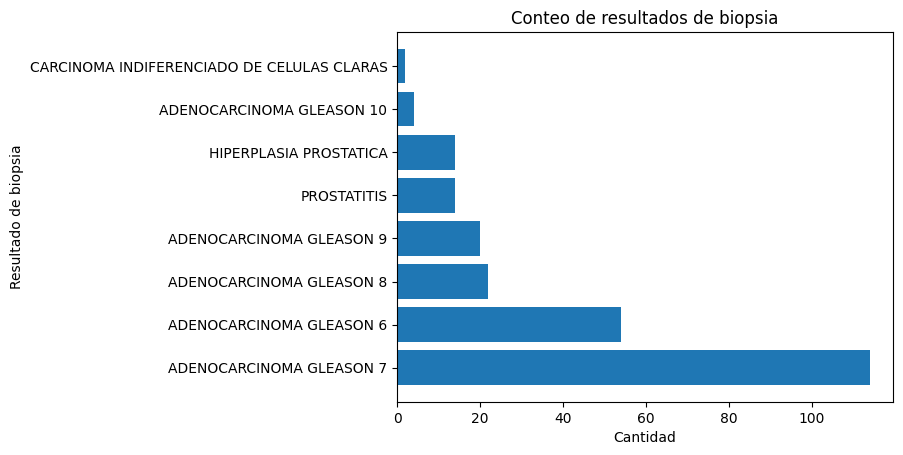

In [ ]:
df3 = df2[df2["BIOPSIA"] != "NEG"]
# Crear el gráfico de barras
plt.barh(df3["BIOPSIA"].value_counts().index, df3["BIOPSIA"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Resultado de biopsia')
plt.title('Conteo de resultados de biopsia')

plt.show()

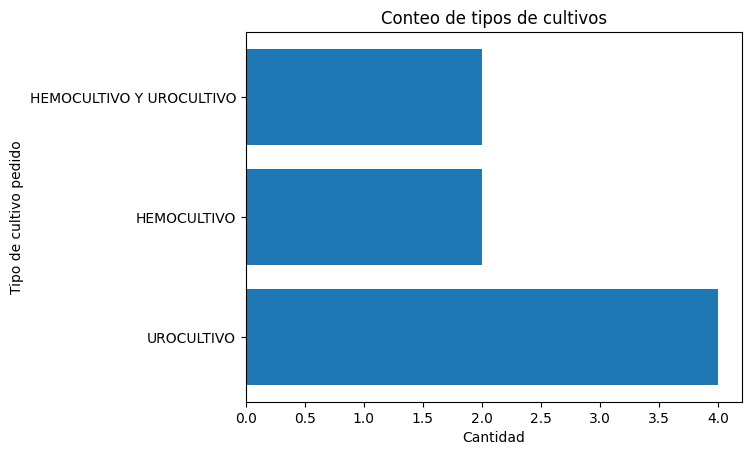

In [ ]:
df3 = df2[df2["TIPO DE CULTIVO"] != "NO"]
plt.barh(df3["TIPO DE CULTIVO"].value_counts().index, df3["TIPO DE CULTIVO"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de cultivo pedido')
plt.title('Conteo de tipos de cultivos')

plt.show()

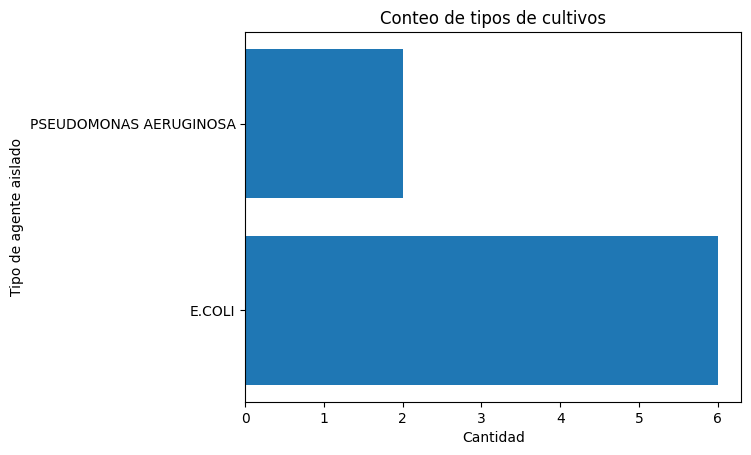

In [ ]:
df3 = df2[df2["AGENTE AISLADO"] != "NO"]
plt.barh(df3["AGENTE AISLADO"].value_counts().index, df3["AGENTE AISLADO"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de agente aislado')
plt.title('Conteo de tipos de cultivos')

plt.show()

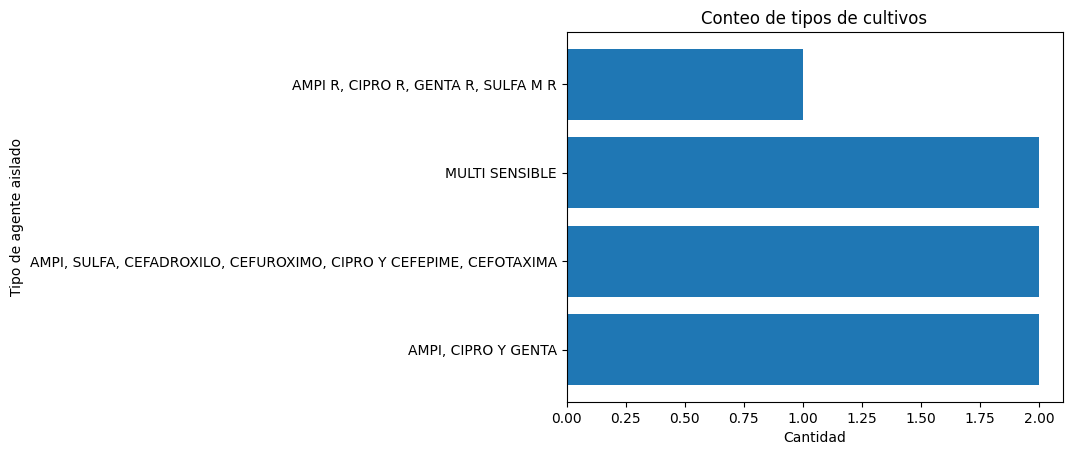

In [ ]:
df3 = df2[df2["PATRON DE RESISTENCIA"] != "NO"]
plt.barh(df3["PATRON DE RESISTENCIA"].value_counts().index, df3["PATRON DE RESISTENCIA"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de agente aislado')
plt.title('Conteo de tipos de cultivos')

plt.show()

**Transformacion de variables**

*Cambiamos* los valores de Si y No por 1 y 0 según corresponda

In [ ]:
df3 = df2.copy()
diccionario = {"NO": 0, "SI": 1}
df3["DIABETES"] = df2.DIABETES.map(diccionario)
df3["HOSPITALIZACIÓN ULTIMO MES"] = df2["HOSPITALIZACIÓN ULTIMO MES"].map(diccionario)
df3["BIOPSIAS PREVIAS"] = df2["BIOPSIAS PREVIAS"].map(diccionario)
df3["VOLUMEN PROSTATICO"] = df2["VOLUMEN PROSTATICO"].map(diccionario)
df3["CUP"] = df2["CUP"].map(diccionario)
df3["FIEBRE"] = df2["FIEBRE"].map(diccionario)
df3["ITU"] = df2["ITU"].map(diccionario)
df3["HOSPITALIZACION"] = df2["HOSPITALIZACION"].map(diccionario)
df3['NUMERO DIAS HASTA INFECCION'] = df2['NUMERO DIAS HASTA INFECCION'].replace('NO',0)


**Cambiamos** las variables categóricas a numéricas



In [ ]:
df3.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. PULMONAR,BIOPSIA,NUMERO DIAS HASTA INFECCION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,0,0,4.0,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0.0,NO,NEG,1,1,0,NO,NO,NO,1
1,56,0,0,7.7,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0.0,NO,NEG,1,1,0,NO,NO,NO,1
2,57,0,0,29.0,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0.0,NO,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1
3,56,0,0,7.0,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0.0,NO,NEG,1,1,0,NO,NO,NO,1
4,55,0,0,29.0,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0.0,NO,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1


Debemos aplicar una transformacion de variables objeto a enteros para mejorar la presicion de la matriz de correlacion, y asi verificar que variables tienen mayor corelacion.

In [ ]:
#aplicamos la reparacion de variavles numericas para crear los parametros dummies
columns = ["ANTIBIOTICO", "ENF. PULMONAR", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]
df4 = df3.copy()
for column in columns:
    if column in df4.columns:
        le = LabelEncoder()
        df4[column] = le.fit_transform(df4[column].astype(str))
    else:
        print(f"Column {column} does not exist in DataFrame")


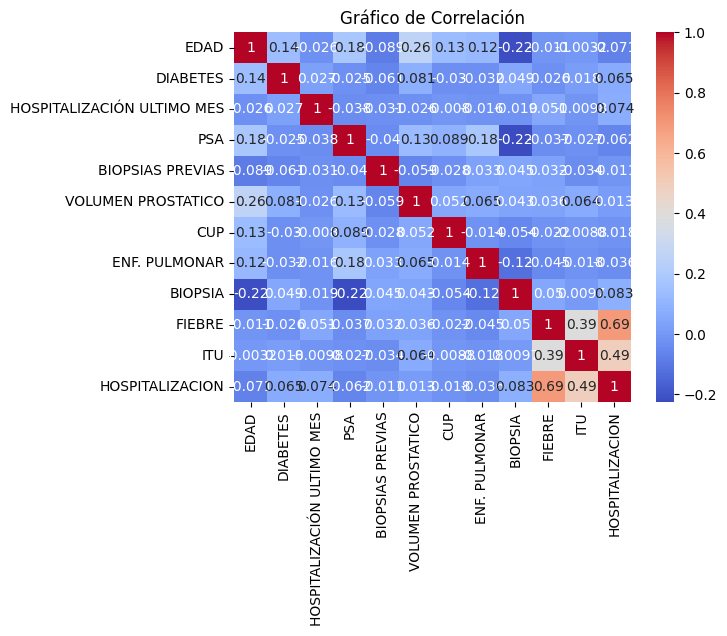

In [ ]:
# Calcular la matriz de correlación para las variables seleccionadas
correlation_matrix = df4[['EDAD','DIABETES', 'HOSPITALIZACIÓN ULTIMO MES','PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'ENF. PULMONAR','BIOPSIA', 'FIEBRE', 'ITU',
       'HOSPITALIZACION']].corr()

# Crear el gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Gráfico de Correlación')
plt.show()

Para eliminar las variables que son altamente correlacionadas a partir del vif.

VIF cuantifica la gravedad de la multicolinealidad en su análisis de regresión. Una regla general es que si el VIF es mayor que 5, la variable explicativa es altamente colineal con las otras variables explicativas y, por esta razón, las estimaciones de los parámetros tienen errores estándar grandes.





In [ ]:

# the independent variables set
X = df4[['EDAD','DIABETES', 'HOSPITALIZACIÓN ULTIMO MES','PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'ENF. PULMONAR','BIOPSIA', 'FIEBRE', 'ITU',
       'HOSPITALIZACION']]
X = X.fillna(X.mean()) #se llenan los valores nulos con la media de los valores de cada casilla.
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,EDAD,8.466639
1,DIABETES,1.167370
2,HOSPITALIZACIÓN ULTIMO MES,1.020317
3,PSA,1.929345
4,BIOPSIAS PREVIAS,1.123904
5,VOLUMEN PROSTATICO,3.986664
6,CUP,1.024438
7,ENF. PULMONAR,1.084081
8,BIOPSIA,4.812103
9,FIEBRE,2.089360


Observamos que EDAD tiene un valor de 8.466 por lo tanto esta variable añade mucho ruido a nuestro modelo. Esta variable no aprorta informacion al modelo, entonces se elimina.

In [ ]:
df3 = df3.drop(["EDAD"], axis = 1)

Aplicamos la reparacion de variavles numericas para crear los parametros dummies

In [ ]:
columns = ["ANTIBIOTICO", "ENF. PULMONAR", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]
df3 = df3.copy()
for column in columns:
    dummies = pd.get_dummies(df3[column], prefix=column)
    df3 = pd.concat([df3, dummies], axis=1)
    df3 = df3.drop(column, axis=1)


df3.head()

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,NUMERO DIAS HASTA INFECCION,FIEBRE,ITU,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_AMPI R, CIPRO R, GENTA R, SULFA M R","PATRON DE RESISTENCIA_AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO
0,0,0,4.0,0.0,1.0,12,0.0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,7.7,0.0,1.0,12,0.0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,29.0,1.0,1.0,24,0.0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,7.0,0.0,1.0,12,0.0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,29.0,1.0,1.0,24,0.0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


Ahora necesitamos dividir los datos en características y objetivos. El objetivo, también llamado etiqueta, es el valor que queremos predecir. En este caso, la temperatura máxima real y las características son columnas que el modelo utiliza para la predicción. También convertiremos los marcos de datos de Pandas en matrices Numpy, ya que así es como funciona el algoritmo. (Guarda los encabezados de las columnas, que son los nombres de las funciones, en una lista para usarlos en una visualización posterior).



In [ ]:
# Las etiquetas son los valores que queremos predecir.
labels = df3['HOSPITALIZACION']
# Eliminar las etiquetas de las funciones.
df3= df3.drop('HOSPITALIZACION', axis = 1)

df3


,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,NUMERO DIAS HASTA INFECCION,FIEBRE,ITU,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_AMPI R, CIPRO R, GENTA R, SULFA M R","PATRON DE RESISTENCIA_AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO
0,0,0,4.00,0.0,1.0,12,0.0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,7.70,0.0,1.0,12,0.0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,29.00,1.0,1.0,24,0.0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,7.00,0.0,1.0,12,0.0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,29.00,1.0,1.0,24,0.0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0,0,6.00,0.0,1.0,12,0.0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
564,0,0,4.80,0.0,1.0,12,0.0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
565,0,0,4.43,NaN,NaN,20,NaN,0,0,0,...,1,0,0,1,0,0,0,0,0,1
566,0,0,8.00,0.0,1.0,12,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


RandomForest es un algoritmo de aprendizaje supervisado que utiliza un conjunto de árboles de decisión para hacer predicciones. Cada árbol en el RandomForest se construye a partir de una muestra de los datos de entrenamiento, seleccionada al azar con reemplazo. Además, en lugar de considerar todas las características para hacer una división en cada nodo del árbol, sólo se considera un subconjunto de características seleccionado al azar. Esto resulta en un conjunto diverso de árboles que son capaces de capturar diferentes patrones en los datos.


Algunos de los hiperparámetros más importantes en un RandomForest incluyen:
n_estimators: El número de árboles en el bosque.
max_depth: La profundidad máxima de los árboles.
min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno.
min_samples_leaf: El número mínimo de muestras requeridas para ser una hoja del nodo.

In [ ]:
df3 = df3.fillna(X.mean()) #se llenan los valores nulos con la media de los valores de cada casilla.

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un modelo RandomForest
rf = RandomForestClassifier()

# Crear el modelo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo GridSearchCV a los datos
grid_search.fit(df3, labels)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

mostrar mejores parametros

In [ ]:
mejores_parametros = grid_search.best_params_
mejores_parametros

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 10}

**Modelado**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba.
train_features, test_features, train_labels, test_labels = train_test_split(df3, labels, test_size = 0.10, random_state = 42)

mostrar si si quedaron melosky

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (508, 39)
Training Labels Shape: (508,)
Testing Features Shape: (57, 39)
Testing Labels Shape: (57,)


Crear el forest classifier

In [ ]:
# Instanciar modelo con 10 árboles de decisión
rf = RandomForestClassifier(n_estimators = 10,max_depth = 10,min_samples_split = 10,min_samples_leaf = 1, random_state = 42)
# Entrenar el modelo con datos de entrenamiento.
rf.fit(train_features, train_labels);

Predecir con el modelo ya entrenado

In [ ]:
# Utilice el método de predicción del RandomForest de prueba.
predictions = rf.predict(test_features)

Mostrar que tal le fue al modelo prediciendo las vainas

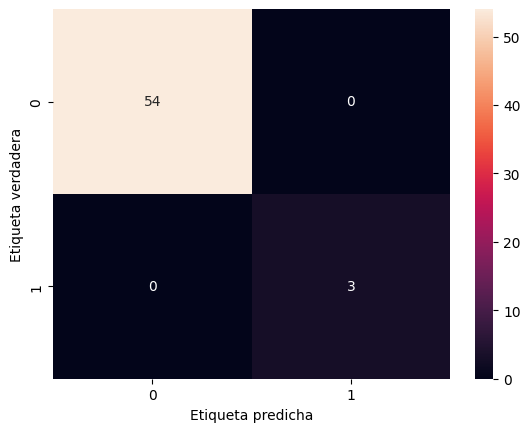

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predictions)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')

plt.show()

Podemos asumir que el modelo se ajusta correctamente. pero podemos hacer otras pruebas

In [ ]:

# Calcular el error Cuadratico medio
mse = mean_squared_error(test_labels, predictions)
# Imprime el error absoluto medio (mae)
print('Error Cuadratico medio:', round(mse, 5 ), 'grados.')

Error Cuadratico medio: 0.0 grados.


In [ ]:
# Calcular los errores absolutos
errors = abs(predictions - test_labels)
# Imprime el error absoluto medio (mae)
print('Error Absoluto Medio:', round(np.mean(errors), 5), 'grados.')

Error Absoluto Medio: 0.0 grados.


In [ ]:
mse = recall_score(test_labels, predictions)
# Imprime la razon entre los tp/(tp+fn)
print("Exactitud del", round(mse, 5)*100, '%.')

Exactitud del 100.0 %.


El conjunto de datos se divide en k partes iguales y el modelo se entrena k veces, cada vez utilizando una parte diferente como conjunto de prueba y el resto como conjunto de entrenamiento. Esto ayuda a garantizar que el modelo pueda generalizarse bien a datos nuevos, no solo a los datos con los que se entrenó. Un MDE de 0 es muy inusual y puede indicar un buen ajuste del modelo a los datos. Sin embargo, esto puede ser una señal de sobreajuste, especialmente si no se observa un rendimiento similar en el conjunto de validación cruzada. El sobreajuste ocurre cuando un modelo aprende los detalles y el ruido del conjunto de entrenamiento hasta tal punto que afecta negativamente su rendimiento en datos nuevos, nunca antes vistos.



In [ ]:
# Realizar la validación cruzada de 5-Fold
scores = cross_val_score(rf, df3, labels, cv=5)

print(f'Scores de validación cruzada: {scores}')
print(f'Promedio de scores: {scores.mean()}')

Scores de validación cruzada: [0.9380531  1.         1.         1.         0.99115044]
Promedio de scores: 0.9858407079646018


Estos resultados indican que este modelo RandomForest tiene un rendimiento muy alto en la validación cruzada de 5-Fold. Las puntuaciones de precisión para cada iteración están muy cerca de 1, lo que indica que el modelo hizo predicciones muy precisas en cada conjunto de prueba.

El promedio de las puntuaciones de precisión es aproximadamente 0.986, lo que también indica un alto nivel de precisión general del modelo.

Sin embargo, un rendimiento tan alto podría sugerir que el modelo está sobreajustado a los datos de entrenamiento.